In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('digital_wallet_transactions.csv')
df

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban


In [ ]:
#Preprocesing
# Filter hanya transaksi sukses
df = df[df["transaction_status"] == "Successful"]

In [ ]:
df["merchant_name"].value_counts()

,count
merchant_name,
Airbnb,99
Flipkart,97
MakeMyTrip,78
Netflix,68
Unacademy,67
...,...
HDFC Life,38
Minecraft,37
EaseMyTrip,36


In [ ]:
df.dtypes

,0
idx,int64
transaction_id,object
user_id,object
transaction_date,object
product_category,object
product_name,object
merchant_name,object
product_amount,float64
transaction_fee,float64
cashback,float64


In [ ]:
df.tail(5)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban
4999,5000,5e1a9245-9f2b-4ff9-bd56-26fd20c8eae2,USER_08419,2024-08-18 01:15,Food Delivery,Vegetable Biryani,Foodpanda,1683.63,11.43,70.44,936,UPI,Successful,MERCH_0446,Web,Urban


In [ ]:
#understanding/finding out each customers rec, freq and monetary values

#Recency

day="2024-08-31"
day=pd.to_datetime(day)
df['transaction_date']=pd.to_datetime(df["transaction_date"])



Recency=df.groupby(["user_id"]).agg({"transaction_date":lambda x:((day-x.max()).days)}).rename(columns={"transaction_date": "Recency"})


/tmp/ipython-input-2470796863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_date']=pd.to_datetime(df["transaction_date"])


In [ ]:
Recency.head(10)

,Recency
user_id,
USER_00001,94
USER_00002,302
USER_00019,166
USER_00020,268
USER_00025,79
USER_00026,346
USER_00028,39
USER_00032,332
USER_00033,136


In [ ]:
#frequency
# Hitung Frequency = jumlah transaksi unik per user
freq = df.drop_duplicates(subset="transaction_id") \
                 .groupby("user_id")[["transaction_id"]] \
                 .count() \
                 .rename(columns={"transaction_id": "Frequency"})

print(freq.head(5))

            Frequency
user_id              
USER_00001          1
USER_00002          1
USER_00019          2
USER_00020          1
USER_00025          1


In [ ]:
df['total'] = df['product_amount'] + df['transaction_fee'] - df['cashback']

/tmp/ipython-input-1819173375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = df['product_amount'] + df['transaction_fee'] - df['cashback']


In [ ]:
#monetary
money=df.groupby(["user_id"])[["total"]].sum().rename(columns={"total": "Monetary"})
money

,Monetary
user_id,
USER_00001,5757.17
USER_00002,1768.09
USER_00019,5338.68
USER_00020,3634.29
USER_00025,8220.07
...,...
USER_09991,8924.26
USER_09992,5941.96
USER_09996,4796.78


In [ ]:
RFM=pd.concat([Recency,freq,money], axis=1)
Recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]
RFM

,Recency,Frequency,Monetary
user_id,,,
USER_00001,94,1,5757.17
USER_00002,302,1,1768.09
USER_00019,166,2,5338.68
USER_00020,268,1,3634.29
USER_00025,79,1,8220.07
...,...,...,...
USER_09991,168,1,8924.26
USER_09992,76,1,5941.96
USER_09996,370,1,4796.78


In [ ]:
RFM.loc["USER_05939"]

,USER_05939
Recency,13.00
Frequency,4.00
Monetary,21074.16


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)


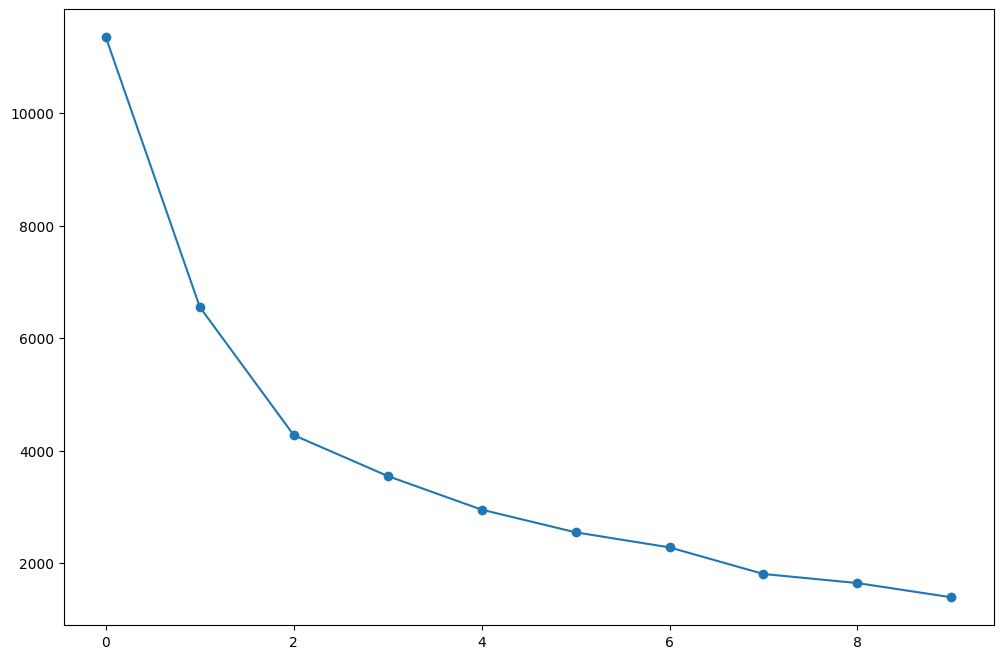

In [ ]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")





In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters
user_id,,,,
USER_00001,94,1,5757.17,2
USER_00002,302,1,1768.09,2
USER_00019,166,2,5338.68,1
USER_00020,268,1,3634.29,2
USER_00025,79,1,8220.07,2
...,...,...,...,...
USER_09991,168,1,8924.26,2
USER_09992,76,1,5941.96,2
USER_09996,370,1,4796.78,2


In [ ]:
final=RFM.groupby("Clusters")[["Recency","Frequency","Monetary"]].mean()
final

,Recency,Frequency,Monetary
Clusters,,,
1,135.288538,2.013834,7672.528458
2,192.512890,1.000000,4940.925641
3,110.802432,2.395137,15165.165957


In [ ]:
totals=RFM.groupby("Clusters")[["Recency","Frequency","Monetary"]].sum()
totals

,Recency,Frequency,Monetary
Clusters,,,
1,68456,1019,3882299.40
2,567528,2948,14565848.79
3,36454,788,4989339.60


In [ ]:
def func(row):
    if row["Clusters"]==1:
        return 'Loyal Customers'
    elif row["Clusters"]==2:
        return 'Lost Customers'
    else:
        return 'Potential Customers'

In [ ]:
RFM['group']=RFM.apply(func, axis=1)

In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters,group
user_id,,,,,
USER_00001,94,1,5757.17,2,Lost Customers
USER_00002,302,1,1768.09,2,Lost Customers
USER_00019,166,2,5338.68,3,Potential Customers
USER_00020,268,1,3634.29,2,Lost Customers
USER_00025,79,1,8220.07,2,Lost Customers
...,...,...,...,...,...
USER_09991,168,1,8924.26,2,Lost Customers
USER_09992,76,1,5941.96,2,Lost Customers
USER_09996,370,1,4796.78,2,Lost Customers


In [ ]:
result=RFM.group.value_counts()

In [ ]:
result

,count
group,
Lost Customers,2948
Potential Customers,518
Loyal Customers,317


<Axes: ylabel='group'>

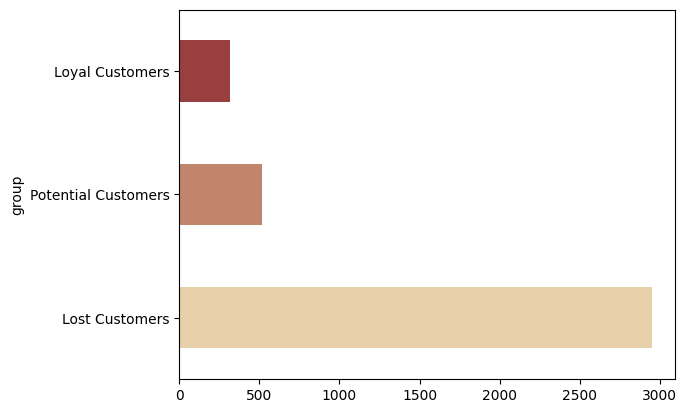

In [ ]:
result.plot(kind="barh", color=["#E6CFA9","#C1856D","#9A3F3F"])

Cohort Analysis

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("digital_wallet_transactions.csv")
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Tambah order_month dan cohort
df['order_month'] = df['transaction_date'].dt.to_period('M')
df['cohort'] = df.groupby('user_id')['transaction_date'].transform('min').dt.to_period('M')

# Hitung Cohort Index
def cohort_index(df):
    return (df['order_month'].dt.to_timestamp().dt.year - df['cohort'].dt.to_timestamp().dt.year) * 12 + \
           (df['order_month'].dt.month - df['cohort'].dt.month) + 1

df['cohort_index'] = cohort_index(df)

# Hitung jumlah user unik per cohort + cohort index
cohort_data = df.groupby(['cohort', 'cohort_index'])['user_id'].nunique().reset_index()

# Pivot
cohort_pivot = cohort_data.pivot(index='cohort', columns='cohort_index', values='user_id')

# Hitung retention
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)

print(retention.head())


cohort_index   1      2      3      4      5      6      7      8      9   \
cohort                                                                      
2023-08       1.0  0.030  0.065  0.036  0.042  0.060  0.054  0.036  0.042   
2023-09       1.0  0.040  0.032  0.050  0.035  0.045  0.035  0.037  0.040   
2023-10       1.0  0.047  0.047  0.034  0.029  0.047  0.037  0.037  0.042   
2023-11       1.0  0.036  0.050  0.059  0.042  0.031  0.050  0.047  0.059   
2023-12       1.0  0.050  0.025  0.044  0.033  0.030  0.033  0.036  0.028   

cohort_index     10     11     12     13  
cohort                                    
2023-08       0.036  0.060  0.060  0.012  
2023-09       0.042  0.065  0.027    NaN  
2023-10       0.024  0.024    NaN    NaN  
2023-11       0.028    NaN    NaN    NaN  
2023-12         NaN    NaN    NaN    NaN  


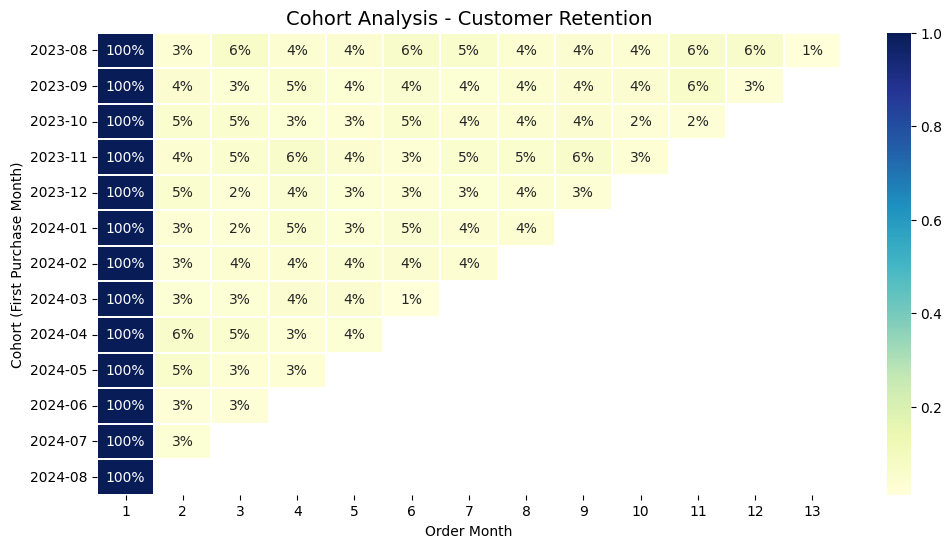

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Cohort Retention Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention,
    annot=True, fmt=".0%",
    cmap="YlGnBu",
    linewidths=0.3
)

plt.title("Cohort Analysis - Customer Retention", fontsize=14)
plt.ylabel("Cohort (First Purchase Month)")
plt.xlabel("Order Month")
plt.yticks(rotation=0)
plt.show()
